In [0]:
#!pip install sympy


In [0]:
from sympy import *
# init_session()
from IPython.display import Markdown as md
from IPython.display import display
from __future__ import division
a, x, y, z, t = symbols('a x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing(use_latex=False)

import pandas as pd
import matplotlib as plt

In [0]:
from sympy.calculus.util import continuous_domain  
from sympy.solvers.inequalities import solve_univariate_inequality, reduce_rational_inequalities

def trozos(f):
    # Función que devuelve el extremo superior de los tramos, los límites laterales, el valor de la función y la función parcial
    sol = []
    for i,s  in enumerate(f.args):
        if(i<len(f.args)-1):
            extremo = f.args[i][1].as_set().sup
            #display(extremo)
            #display(s)
            #display(limit(f.args[i][0],x,extremo, dir='-'))
            #display(limit(f.args[i][0],x,extremo, dir='+'))
            #display(f.subs(x,extremo))
            sol.append((extremo, limit(f.args[i][0],x,extremo, dir='-'), limit(f.args[i+1][0],x,extremo, dir='+'),f.subs(x,extremo), f.args[i][0]))        
    return sol

def estudio(f) :
    # Estudio en una función a trozos
    
    set = S.Reals
    conj_singular = S.EmptySet
    for j, t in enumerate(f.args) :
        #display(singularities(t[0],x))
        #conj_singular = Union(conj_singular,singularities(t[0],x))
        #display(Union(conj_singular,singularities(t[0],x)))
        #conj_singular = Union(conj_singular,Complement(S.Reals,continuous_domain(t[0],x,S.Reals)))
        #conj_singular = Union(conj_singular,Intersection(t[1].as_set(),Complement(S.Reals,continuous_domain(t[0],x,S.Reals))))
        set2 = Intersection(set,t[1].as_set())
        conj_singular = Union(conj_singular,Intersection(set2,Complement(S.Reals,continuous_domain(t[0],x,S.Reals))))
        set = Complement(S.Reals,t[1].as_set())
        
    sol = r"Singularidades de las expresiones analíticas: $"+ latex(conj_singular)+"$"  
    sol += r".\\ Posibles discontinuidades en los extremos de los trozos:"

    xs = []
    estudio = []

    for j, t in enumerate(trozos(f)) :
        xs.append(str(t[0]))
        if (t[1]==t[2]) :
            estudio.append(r"\\En {} es continua ya que hay límite y $\lim = f({})={}$".format(t[0],t[0],t[3]))
            display(r"En $x_0={}$ hay límite y f({})={}".format(t[0],t[0],t[3]))
        else :
            estudio.append(r"\\En {} no es continua porque no existe límite. Límites laterales: ${}$ y ${}$".format(t[0], latex(t[1]), latex(t[2])))
            display(r"En {} no existe límite. Límites laterales: {} y  {}".format(t[0], t[1], t[2]))

    sol+=', '.join(xs)+r"."+'. '.join(estudio)
    return(sol)
    
    
def asintotas(f) :
    # Igual usar singularities mejor: asintotas, verticales, horizontales y oblícuas (a,b) en oo y -oo
    asint = []
    asintex = r'Asíntotas:\\'
    sing=EmptySet()
    for k in [(Intersection(j.boundary,j.complement(S.Reals))) for j in [i for i in list(continuous_domain(f,x,domain=S.Reals).args)]] :
            sing = sing + k
    list(sing)
    asint.append([(i,limit(f,x,i)) for i in list(sing)])
    asintex += ', '.join(r'A.V. $x='+str(i)+r'$\\' for i in list(sing))
#     asint.append([(i,limit(f,x,i)) for i in list(S.Reals - continuous_domain(f,x,domain=S.Reals))])
#     asintex += ', '.join(r'A.V. $x='+str(i)+r'$\\' for i in list(S.Reals - continuous_domain(f,x,domain=S.Reals)))
    if abs(limit(f,x,oo)) != oo:
        asintex += r'A.H. $y='+latex(limit(f,x,oo))+r'$\\'
    if abs(limit(f,x,-oo)) != oo:
        asintex += r'A.H. $y='+latex(limit(f,x,-oo))+r'$\\'
  
    asint.append([(oo,limit(f,x,oo)), (-oo,limit(f,x,-oo))])
    oblicuas=[]
    if abs(limit(f/x,x,oo)) != oo :
        oblicuas.append((oo,limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo)))
        #display(latex(limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo)))
        asintex += r'A.O. $y='+latex(limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo))+r'$ \\'
    if abs(limit(f/x,x,-oo)) != oo :
        oblicuas.append((-oo,limit(f/x,x,-oo)*x+limit(f-limit(f/x,x,-oo)*x,x,-oo)))
        asintex += r'A.O. $y='+latex(limit(f/x,x,-oo)*x+limit(f-limit(f/x,x,-oo)*x,x,-oo))+r'$ \\'
    asint.append(oblicuas)
    return asint,asintex

def crecimiento(f) :
    #crecimiento, decrecimiento y puntos singulares
    crec = reduce_rational_inequalities([[f.diff()>0]],x,relational=False)
    decrec = reduce_rational_inequalities([[f.diff()<0]],x,relational=False)
    sing = []
    for t in solve(f.diff()) :
        if f.diff().diff().subs(x,t) < 0 :
            tipo = 'max'
        elif f.diff().diff().subs(x,t) > 0 :
            tipo = 'min'
        else :
            tipo = 'posible_inflex'      
        sing.append([t,tipo])

    sol=[crec,decrec,sing]

    return sol

def curvatura(f) :
    #crecimiento, decrecimiento y puntos singulares
    conc = reduce_rational_inequalities([[f.diff().diff()>0]],x,relational=False)
    conv = reduce_rational_inequalities([[f.diff().diff()<0]],x,relational=False)
    sing = []
    for t in solve(f.diff().diff()) :
        if f.diff().diff().diff().subs(x,t) == 0 :
            tipo = 'no_inflex'
        else :
            tipo = 'inflex'      
        sing.append([t,tipo])

    sol=[conc,conv,sing]

    return sol


def mi_plot(f, nombre='sin_nombre', xmax=10) :
        plt.rcParams['figure.figsize'] = 10,10
        #p1 = plot(f,show=True, xlim=(-xmax,xmax), ylim=(-xmax,xmax))
        
        #p1 = plot(f, xlim=(-xmax,xmax), ylim=(-xmax,xmax))
        p1 = plot_implicit(Eq(y,f),x_var=(x, -xmax, xmax), y_var=(y, -xmax, xmax))
        p1.save(nombre+".png")
#        p1.save("prueba.png")
        return r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (nombre)



f = Piecewise((E**(2*x),x<0),(x**2+a,x<=3),((x+5)/(x-3),x>3))
trozos(f), f.args


⎛⎡⎛             2⋅x⎞  ⎛                         2⎞⎤  ⎛⎛ 2⋅x       ⎞  ⎛     2  
⎜⎣⎝0, 1, a, a, ℯ   ⎠, ⎝3, a + 9, ∞, a + 9, a + x ⎠⎦, ⎜⎝ℯ   , x < 0⎠, ⎝a + x , 
⎝                                                    ⎝                        

     ⎞  ⎛x + 5       ⎞⎞⎞
x ≤ 3⎠, ⎜─────, x > 3⎟⎟⎟
        ⎝x - 3       ⎠⎠⎠

In [0]:
#from sympy.parsing.latex import  parse_latex
datos = ['1/x+2*log(x)-log(x)/x', 'E**x/(x-1)**2']

for f in datos :
  print(S(f, evaluate= False).diff())
  print(r"$"+latex(S(f, evaluate= False).diff())+"="+latex(simplify(S(f, evaluate= False).diff()))+r"$")

2/x + log(x)/x**2 - 2/x**2
$\frac{2}{x} + \frac{1}{x^{2}} \log{\left (x \right )} - \frac{2}{x^{2}}=\frac{1}{x^{2}} \left(2 x + \log{\left (x \right )} - 2\right)$
(-2*x + 2)*exp(x)/(x - 1)**4 + exp(x)/(x - 1)**2
$\frac{\left(- 2 x + 2\right) e^{x}}{\left(x - 1\right)^{4}} + \frac{e^{x}}{\left(x - 1\right)^{2}}=\frac{e^{x}}{\left(x - 1\right)^{4}} \left(- 2 x + \left(x - 1\right)^{2} + 2\right)$


In [0]:
datos = [['4*x**3+E**(3*x)',0,2]]

for f in datos :
  funcion = (S(f[0], evaluate= False))
  print(funcion) 
  print(r"$"+latex(Integral(funcion,(x,f[1],f[2])))+r"=\left["+latex(Integral(funcion,x).doit())+r"\right]_{"+latex(f[1])+"}^"+latex(f[2])+"="+latex(Integral(funcion,(x,f[1],f[2])).doit())+r"$") 

4*x**3 + E**(3*x)
$\int_{0}^{2} \left(4 x^{3} + e^{3 x}\right)\, dx=\left[x^{4} + \frac{e^{3 x}}{3}\right]_{0}^2=\frac{47}{3} + \frac{e^{6}}{3}$


In [0]:
datos = ['sqrt(10+3*x- 5/4*x**2)']

for f in datos :
  funcion = (S(f, evaluate= False))
  print(funcion)  
  print(r"$f'(x)="+latex(funcion.diff())+"="+latex(simplify(funcion.diff()))+r"$")
  extremos = solve(simplify(funcion.diff()))
  segunda_derivada = simplify(funcion.diff().diff())
  print(r"$f''(x)="+latex(funcion.diff().diff())+"="+latex(simplify(funcion.diff().diff()))+r"$")
  for j in extremos :
    print(latex(j))
    print(latex(segunda_derivada.subs(x,j)))

sqrt(-5*x**2/4 + 3*x + 10)
$f'(x)=\frac{- \frac{5 x}{4} + \frac{3}{2}}{\sqrt{- \frac{5 x^{2}}{4} + 3 x + 10}}=\frac{- 5 x + 6}{2 \sqrt{- 5 x^{2} + 12 x + 40}}$
$f''(x)=\frac{\left(- \frac{5 x}{4} + \frac{3}{2}\right) \left(\frac{5 x}{4} - \frac{3}{2}\right)}{\left(- \frac{5 x^{2}}{4} + 3 x + 10\right)^{\frac{3}{2}}} - \frac{5}{4 \sqrt{- \frac{5 x^{2}}{4} + 3 x + 10}}=- \frac{118}{\left(- 5 x^{2} + 12 x + 40\right)^{\frac{3}{2}}}$
\frac{6}{5}
- \frac{5 \sqrt{295}}{236}


In [0]:
from sympy.calculus.util import continuous_domain
import numpy as np 

datos = [[Piecewise(((x-3)/((x-4)*(x-5)),x<=3),((x**2-2)/((x+1)*(x+3)),x>3)), 3]]

for f in datos :
  funcion = f[0]
  dominio = S.Reals
  dominio = continuous_domain(funcion, x, S.Reals)
  print(latex(dominio))
  print(latex(funcion))

#tramo_funcion = np.asarray(funcion.args)
tramos = list(list(zip(*funcion.args))[0])

for j in tramos :
  print(j)
  print(limit(j,x,3))

estudio(funcion), print(latex(crecimiento(tramos[0])))
print(latex(factor(simplify(tramos[0].diff()))))
print(latex(solve(factor(simplify(tramos[0].diff())))))
print(latex(tramos[0].subs(x,3-sqrt(2).evalf(2))))
print(limit(tramos[0],x,-oo))
print(latex(tramos[0].subs(x,3)))
#funcion, #mi_plot(funcion)



\mathbb{R}
\begin{cases} \frac{x - 3}{\left(x - 5\right) \left(x - 4\right)} & \text{for}\: x \leq 3 \\\frac{x^{2} - 2}{\left(x + 1\right) \left(x + 3\right)} & \text{for}\: x > 3 \end{cases}
(x - 3)/((x - 5)*(x - 4))
0
(x**2 - 2)/((x + 1)*(x + 3))
7/24


'En 3 no existe límite. Límites laterales: 0 y  7/24'

\left [ \left(- \sqrt{2} + 3, 4\right) \cup \left(4, \sqrt{2} + 3\right), \quad \left(-\infty, - \sqrt{2} + 3\right) \cup \left(\sqrt{2} + 3, 5\right) \cup \left(5, \infty\right), \quad \left [ \left [ - \sqrt{2} + 3, \quad min\right ], \quad \left [ \sqrt{2} + 3, \quad max\right ]\right ]\right ]
- \frac{x^{2} - 6 x + 7}{\left(x - 5\right)^{2} \left(x - 4\right)^{2}}
\left [ - \sqrt{2} + 3, \quad \sqrt{2} + 3\right ]
-0.17
0
0


\left(0, \infty\right)
\frac{1}{x^{2}} \left(- \log{\left (x \right )} + 1\right)
\frac{1}{x^{3}} \left(2 \log{\left (x \right )} - 3\right)
4.48168907033806


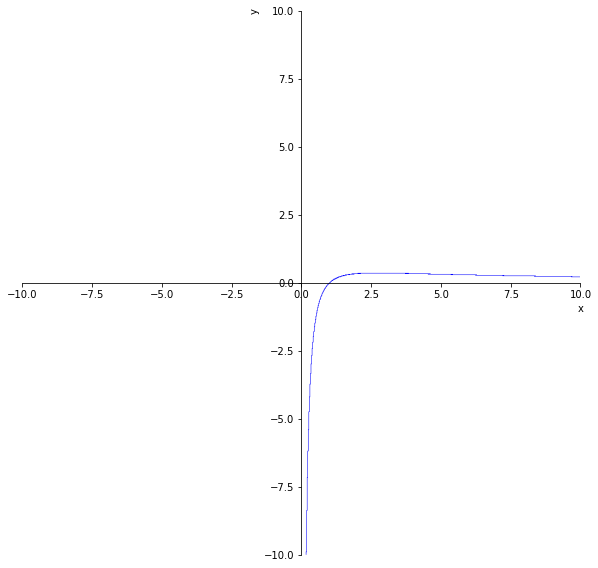

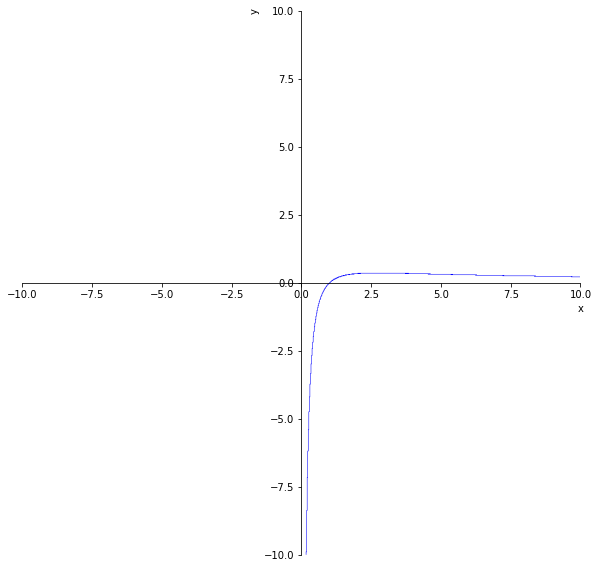

In [0]:
datos = [log(x)/x]

for f in datos :
    print(latex(continuous_domain(f,x,domain=S.Reals)))
    der_1 = simplify(f.diff())
    print(latex(der_1))
    der_2 = simplify(f.diff().diff())
    print(latex(der_2))
    print(latex(solve(der_2)[0].evalf()))
    mi_plot(f)

In [0]:
datos = [x**3 - 6*x**2+8*x]
for f in datos :
    der_1 = simplify(f.diff())
    print(latex(der_1))

for s in solve(der_1+1):
  print(latex(datos[0].subs(x,s)))

3 x^{2} - 12 x + 8
3
-3


In [0]:
datos=[x**2+5*x+1/x, 1/(x+2)**3, (x+7)/x**2, 7*x/sqrt(x**2+1) ]
for f in datos :
  print(r"$"+latex(Integral(f))+"="+latex(Integral(f).doit())+r"+ C $")

$\int \left(x^{2} + 5 x + \frac{1}{x}\right)\, dx=\frac{x^{3}}{3} + \frac{5 x^{2}}{2} + \log{\left (x \right )}+ C $
$\int \frac{1}{\left(x + 2\right)^{3}}\, dx=- \frac{1}{2 x^{2} + 8 x + 8}+ C $
$\int \frac{1}{x^{2}} \left(x + 7\right)\, dx=\log{\left (x \right )} - \frac{7}{x}+ C $
$\int \frac{7 x}{\sqrt{x^{2} + 1}}\, dx=7 \sqrt{x^{2} + 1}+ C $
